# Basic plotting with Pandas built-in functions exercise

Here we'll practice our skills on [accessing DataFrames](AccessingDataFrames.ipynb) and [basic Pandas plotting(BasicPandasPlotting.ipynb).

*Don't look at them yet, but the solutions are in 
[PlottingExerciseSolutions](PlottingExerciseSolutions.ipynb)*

### Start by importing the Pandas module

We always start by importing the pandas module and giving it a shorter name so we don't have to write out "pandas" before each command.

In [1]:
import pandas as pd

### and telling the notebook to render matplotlib plots "inline"

We do this with one of the "ipython magic" commands, which all start with %

In [2]:
%matplotlib inline

## Load in full percent of women in fields data

Now we want to load in a more full set of data on the percent of women in various fields over time.

- It's stored in a CSV file in the 'data' directory
- the name is 'percent-bachelors-degrees-women-usa.csv'
- it has commas as the separators
- the text "encoding" is 'utf-8'
- don't worry about setting the index yet – we'll do that next

In [3]:
df = pd.read_csv('data/percent-bachelors-degrees-women-usa.csv', sep=',', encoding='utf-8')

### Display the first 6 lines of the DataFrame

In [4]:
df.head(6)

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3
5,1975,18.333162,19.134048,60.9,34.449902,19.686249,41.5,19.8,72.801854,3.2,61.647206,75.0,78.9,40.7,19.1,54.5,63.0,37.7


## Set the DataFrame index to be the Year column

Some of the tests and plotting will be easier if the Year column is set as the Index of our DataFrame. We could have done this in the loading stage, but we'll do it here instead.

**Set the index to Year, "inplace"**

In [5]:
df.set_index('Year', inplace=True)
df.head()

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
Year,,,,,,,,,,,,,,,,,
1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


## Plot all of the data as a line plot of percents over years

Create a line plot with a built-in Pandas plotting routine, where the x-axis is Year (remember that's in the Index now, not a normal column), and the y-axis will be percent, with all of the field columns plotted.

- *A lot of these options are the default!*
- *Don't worry if the legend covers a lot of the plot for now...*

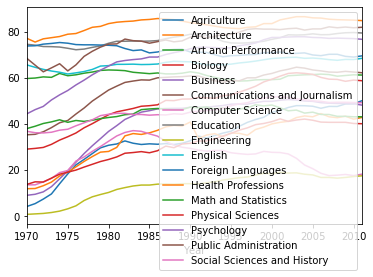

In [6]:
df.plot.line()

## Filtering down to the fields which has low representation in 1970

That's a lot of data to look at together. Let's filter down to the subset of fields which had **less than 20% women in 1970.**

**Start by testing the 1970 row, and all the columns, to see whether it's True or False that they contain a value less than 20.**

In [7]:
lt_20_1970 = df.loc[1970, :] < 20
lt_20_1970

Agriculture                       True
Architecture                      True
Art and Performance              False
Biology                          False
Business                          True
Communications and Journalism    False
Computer Science                  True
Education                        False
Engineering                       True
English                          False
Foreign Languages                False
Health Professions               False
Math and Statistics              False
Physical Sciences                 True
Psychology                       False
Public Administration            False
Social Sciences and History      False
Name: 1970, dtype: bool

## Get a list of columns that pass that test

Now let's access the DataFrame columns, and get those back that pass the test.

*Remember, df.columns is an Index, which is like a special Series, and you can feed almost any of the accessor methods a binary series of the right length (like lt_20_1970), and it will give you back the members that are True.*

In [8]:
low_columns = df.columns[lt_20_1970]
low_columns

Index(['Agriculture', 'Architecture', 'Business', 'Computer Science',
       'Engineering', 'Physical Sciences'],
      dtype='object')

## Now plot only the low columns

We'll use the same plot command, but this time specify which columns to use, so it will only plot the low columns.

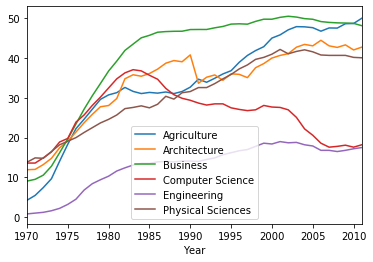

In [9]:
df.plot.line(y=low_columns)